In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

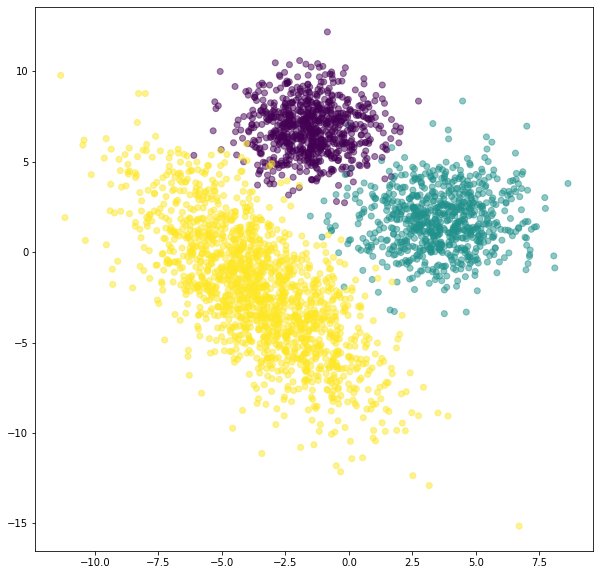

In [3]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [4]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [5]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)

print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


In [6]:
k_means.cluster_centers_

array([[-3.18494242, -2.909118  ],
       [-2.38267054,  6.21386031],
       [ 3.65090178,  1.74134602]])

In [7]:
centroids = k_means.cluster_centers_
print(np.round(centroids).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


In [8]:
class_label, class_count = np.unique(k_means.labels_, return_counts=True)

print(dict(zip(class_label, class_count)))

{0: 1321, 1: 938, 2: 741}


In [61]:
def pupils_data_set():
    df = pd.read_csv('snsdata.csv')
    df_ = df.iloc[:,4:].copy()

    return df_


In [34]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [36]:
X = df.iloc[:,4:].copy()

In [37]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=9, random_state=123))

pipeline.fit(X)
km = pipeline.named_steps['kmeans']

In [13]:
class_label, class_count = np.unique(km.labels_, return_counts=True)
print(dict(zip(class_label, class_count)))

{0: 20345, 1: 424, 2: 830, 3: 1, 4: 1026, 5: 932, 6: 644, 7: 5034, 8: 764}


In [38]:
X['cluster'] = km.labels_

In [39]:
pd.set_option('display.max_columns', None)
n_classes = 9
filter_columns = ['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']

clustered_df = X.groupby('cluster').mean()


In [40]:
for k, group in X.groupby('cluster'):
    print(k)
    top_words = group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)
    print(top_words)

0
music         0.540477
god           0.312362
dance         0.213320
hair          0.180487
shopping      0.167117
basketball    0.160777
football      0.158073
band          0.154239
cute          0.148783
rock          0.147161
dtype: float64
1
god           4.742925
jesus         2.018868
church        1.740566
bible         1.108491
music         1.084906
hair          0.459906
band          0.410377
dance         0.389151
die           0.360849
basketball    0.351415
dtype: float64
2
hollister      1.522892
abercrombie    1.168675
shopping       0.920482
hair           0.913253
music          0.906024
dance          0.693976
mall           0.669880
cute           0.610843
god            0.457831
clothes        0.415663
dtype: float64
3
blonde      327.0
sex          22.0
hair         12.0
god          10.0
death         6.0
die           6.0
drunk         6.0
football      2.0
dress         2.0
sexy          1.0
dtype: float64
4
softball      2.548733
volleyball    1.967836
bask

In [42]:
X.drop('cluster', inplace=True, axis=1)

# EM-Cluster

In [90]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

## Визуализируем

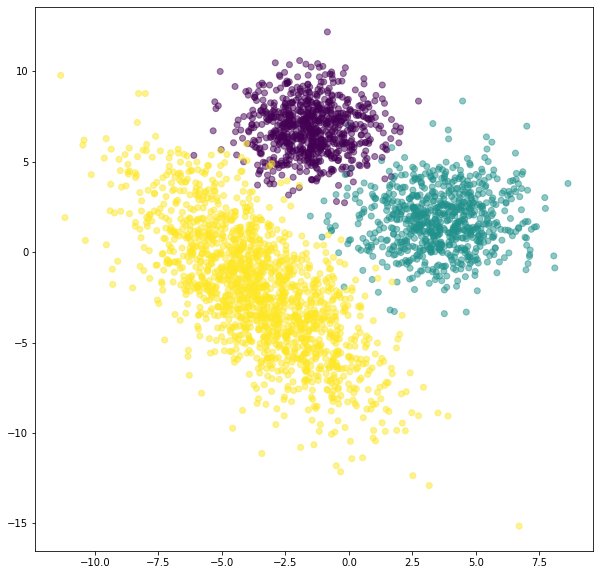

In [91]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [92]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [53]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
y_pred = gm.fit_predict(X)
means = gm.means_

In [54]:
print(np.round(means).astype(np.int))

[[-2 -4]
 [ 1  4]
 [-5  0]]


In [57]:
class_label, class_count = np.unique(y_pred, return_counts=True)
print(dict(zip(class_label, class_count)))

{0: 788, 1: 1510, 2: 702}


In [80]:
df = pupils_data_set()

gm = GaussianMixture(n_components=9, random_state=123)

pipeline = make_pipeline(StandardScaler(), gm)
y_labels= pipeline.fit_predict(df)

In [81]:
df['cluster'] = y_labels


In [85]:
pipeline.named_steps['gaussianmixture'].n_iter_

30

# Агломеративная кластеризация

In [97]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [98]:
ac.n_leaves_

3000

In [99]:
class_label, class_count = np.unique(ac.labels_, return_counts=True)
print(dict(zip(class_label, class_count)))

{0: 1112, 1: 1142, 2: 746}


In [104]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
ac.fit(X)

AgglomerativeClustering(connectivity=<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 21754 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)

In [105]:
class_label, class_count = np.unique(ac.labels_, return_counts=True)
print(dict(zip(class_label, class_count)))

{0: 1486, 1: 746, 2: 768}


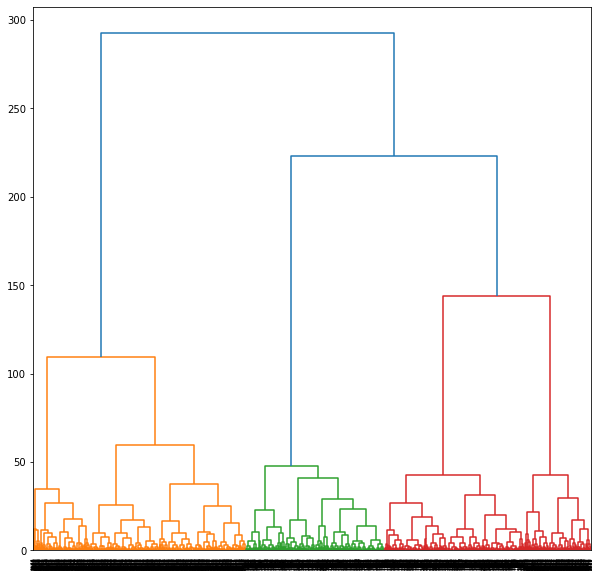

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# Строим дендрограмму
plt.figure()
dn = dendrogram(Z, leaf_rotation=90.)


## Данные о пище

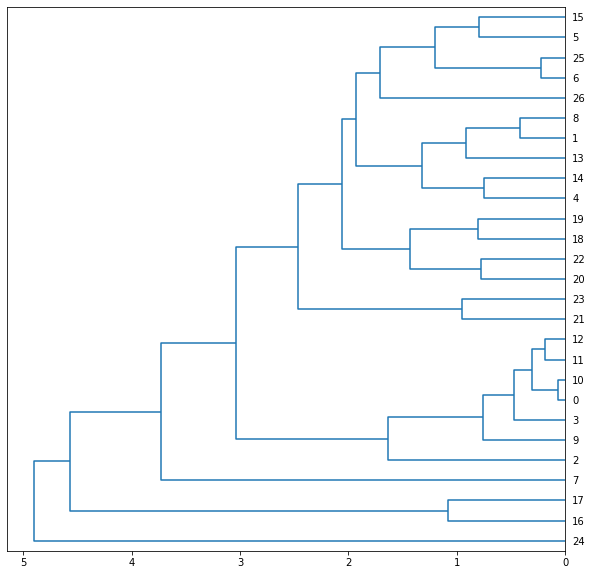

In [161]:
df = pd.read_csv('food.txt', sep=' ')

X = df.iloc[:, 1:]
X = StandardScaler().fit_transform(X)

Z = linkage(X, method='average', metric='euclidean')
names = df.Name.values
dend = dendrogram(Z, color_threshold=0, orientation='left')

from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')


In [168]:
df['cluster'] = labels

In [169]:
df[df.Calcium.between(150, 160)]

,Name,Energy,Protein,Fat,Calcium,Iron,cluster
21,Canned mackerel,155,16,9,157,1.8,3
23,Canned salmon,120,17,5,159,0.7,3


In [172]:
df[df.Fat == df.Fat.max()]

,Name,Energy,Protein,Fat,Calcium,Iron,cluster
2,Roast beef,420,15,39,7,2.0,2


# DBSCAN

In [173]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [174]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [179]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=35)

In [180]:
class_label, class_count = np.unique(dbscan.labels_, return_counts=True)
print(dict(zip(class_label, class_count)))

{-1: 583, 0: 603, 1: 681, 2: 1133}


In [210]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from joblib import dump, load

# Наш датасет
df = load_iris()

# Наши признаки
X = df.data

# Наш таргет
y = df.target

# Разбиваем выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создаем модель
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Сохраняем обученную модель в файл
dump(clf, 'our_iris_model.joblib')

# Загружаем где-то на проде
loaded_model = load('our_iris_model.joblib')

# Предсказываем класс ириса
our_iris = np.array([5, 5.0, 3, 0.3]).reshape(1, 4)

# Передаем данные в загруженную модель
predict_class = loaded_model.predict(our_iris)

# Предсказанный класс модели
print(f'Наш ирис относится к классу: {predict_class}')



Наш ирис относится к классу: [1]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])